# Image segmentation using OPENCV

## Thresholding

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

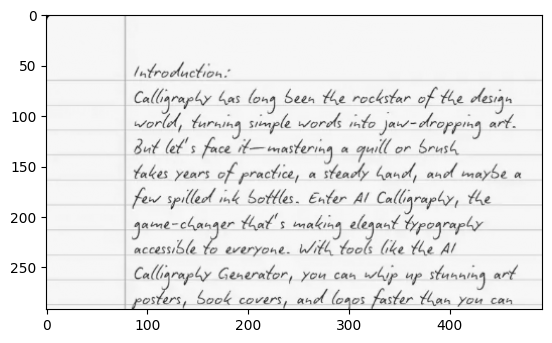

In [2]:
image=cv2.imread("./handwritten.png",0)
plt.imshow(image,cmap='grey')

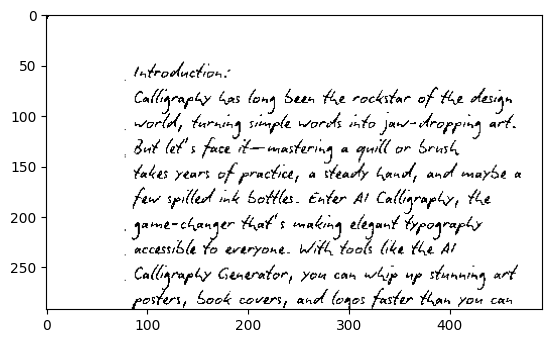

In [3]:
revital,binary=cv2.threshold(image,175,255,type=cv2.THRESH_BINARY)
plt.imshow(binary,cmap='grey')

## Adaptive thresholding

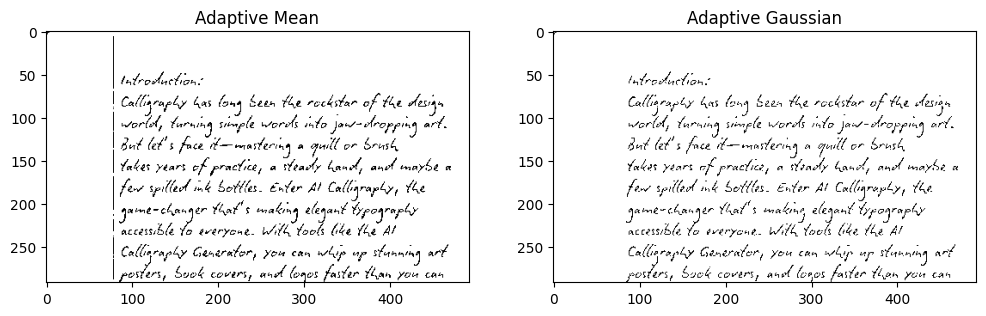

In [4]:
adaptive_mean=cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,50)
adaptive_gaussian=cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,50)
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.imshow(adaptive_mean,cmap='grey')
plt.title("Adaptive Mean")

plt.subplot(1,2,2)
plt.imshow(adaptive_gaussian,cmap='grey')
plt.title("Adaptive Gaussian")

plt.show()

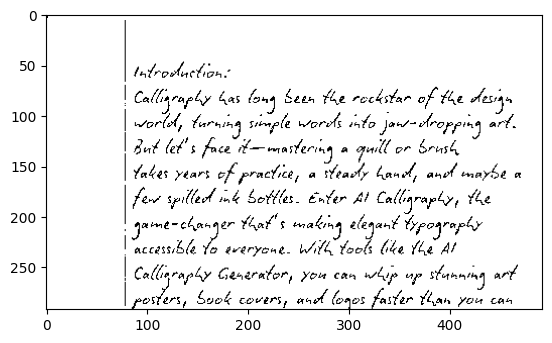

In [5]:
plt.imshow(adaptive_mean,cmap='grey')


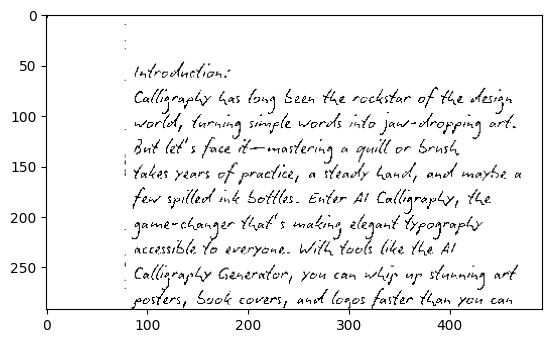

In [6]:

adaptive_gaussian=cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,45)

plt.imshow(adaptive_gaussian,cmap='grey')

## Kmeans Clustering

In [44]:
shapes=cv2.imread("D:/Revise/shapes.png")
shapes_rgb=cv2.cvtColor(shapes,cv2.COLOR_BGR2RGB)

pixel_values=shapes_rgb.reshape((-1,3))
pixel_values=np.float32(pixel_values)


In [58]:
criteria=(cv2.TermCriteria_EPS+cv2.TermCriteria_MAX_ITER,100,0.2)
k=4

_,labels,centers=cv2.kmeans(pixel_values,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [59]:
print(labels.shape)
print(centers)

(828036, 1)
[[214.79994 196.94968  39.02221]
 [255.13672 255.23763 255.02257]
 [209.72443  77.97467 121.87255]
 [ 53.27825 141.73094 141.77394]]


In [60]:
centers=np.uint8(centers)
segmented_image=centers[labels.flatten()]
segmented_image=segmented_image.reshape(shapes.shape)
#index 0-->[255,255,255] 
#index 1-->[53,141, 141]
#index 2-->[221,122,90]

In [61]:
segmented_image

array([[[ 53, 141, 141],
        [ 53, 141, 141],
        [ 53, 141, 141],
        ...,
        [ 53, 141, 141],
        [ 53, 141, 141],
        [ 53, 141, 141]],

       [[ 53, 141, 141],
        [ 53, 141, 141],
        [ 53, 141, 141],
        ...,
        [ 53, 141, 141],
        [ 53, 141, 141],
        [ 53, 141, 141]],

       [[ 53, 141, 141],
        [ 53, 141, 141],
        [ 53, 141, 141],
        ...,
        [ 53, 141, 141],
        [ 53, 141, 141],
        [ 53, 141, 141]],

       ...,

       [[ 53, 141, 141],
        [ 53, 141, 141],
        [ 53, 141, 141],
        ...,
        [ 53, 141, 141],
        [ 53, 141, 141],
        [ 53, 141, 141]],

       [[ 53, 141, 141],
        [ 53, 141, 141],
        [ 53, 141, 141],
        ...,
        [ 53, 141, 141],
        [ 53, 141, 141],
        [ 53, 141, 141]],

       [[ 53, 141, 141],
        [ 53, 141, 141],
        [ 53, 141, 141],
        ...,
        [ 53, 141, 141],
        [ 53, 141, 141],
        [ 53, 141, 141]]

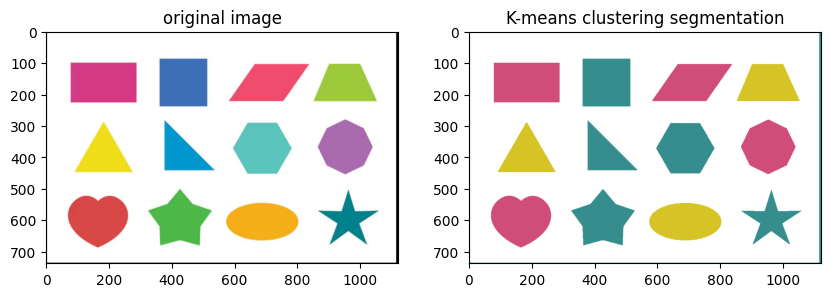

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(shapes_rgb)
plt.title("original image")

plt.subplot(1,2,2)
plt.imshow(segmented_image)
plt.title("K-means clustering segmentation") # white color is also a cluster

plt.show()

# Watershed Algorithm

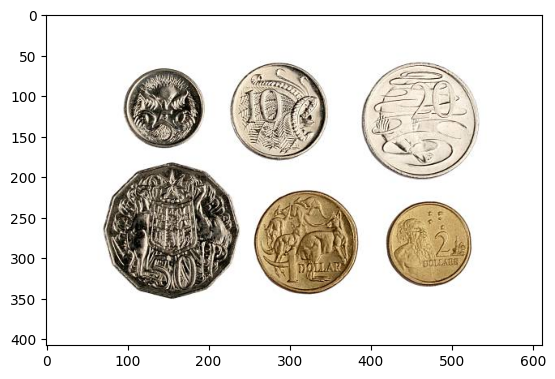

In [181]:
coins=cv2.imread("./Coins.jpg")
coins_rgb=cv2.cvtColor(coins,cv2.COLOR_BGR2RGB)
original_image=coins_rgb.copy()
plt.imshow(coins_rgb)

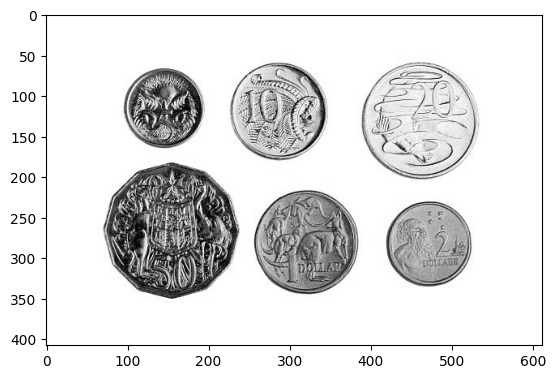

In [182]:
coins_grey=cv2.cvtColor(coins,cv2.COLOR_BGR2GRAY)
plt.imshow(coins_grey,cmap='grey')

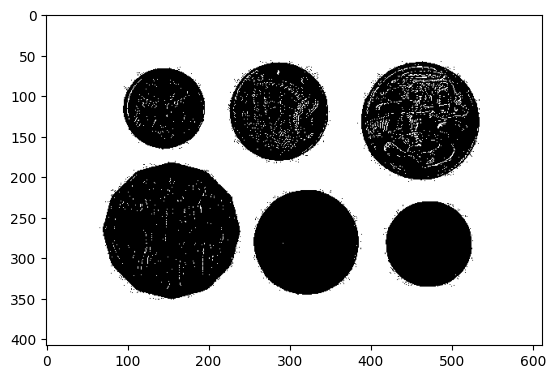

In [192]:
retival,mask=cv2.threshold(coins_grey,245,255,cv2.THRESH_BINARY)
plt.imshow(mask,cmap='grey')

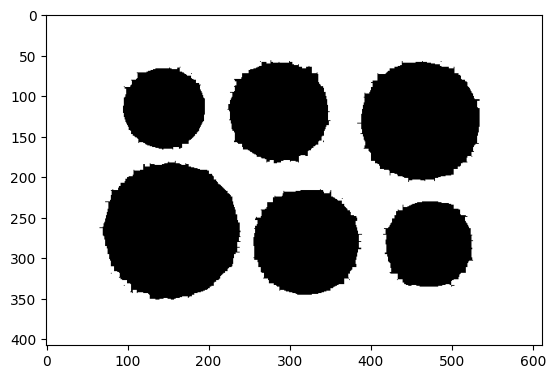

In [212]:
kernal=np.ones((3,3),np.uint8)
openings=cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernal,iterations=2)

plt.imshow(openings,cmap='grey')

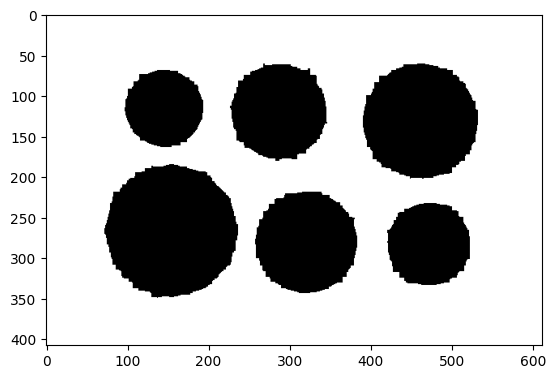

In [213]:
sure_bg=cv2.dilate(openings,kernal,iterations=2)
plt.imshow(sure_bg,cmap='grey')

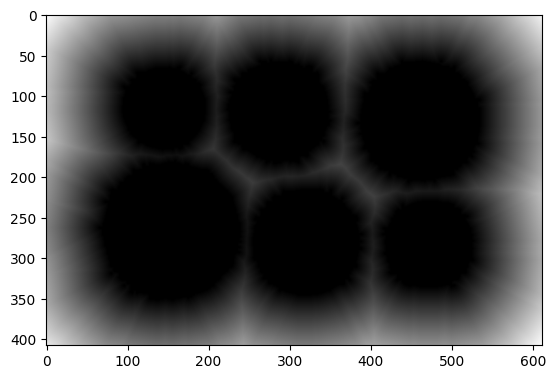

In [229]:
distance_transform=cv2.distanceTransform(openings,cv2.DIST_L2,5)
plt.imshow(distance_transform,cmap='grey')

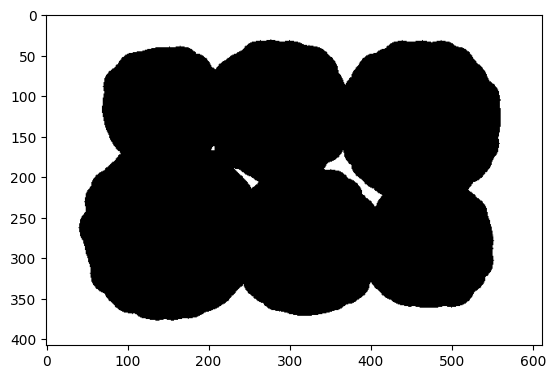

In [230]:
_,sure_fg=cv2.threshold(distance_transform,0.2*distance_transform.max(),255,0)
sure_fg=np.uint8(sure_fg)
plt.imshow(sure_fg,cmap='grey')

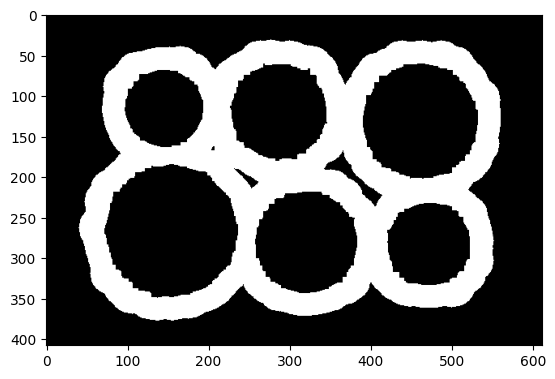

In [231]:
unknown=cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown,cmap='grey')

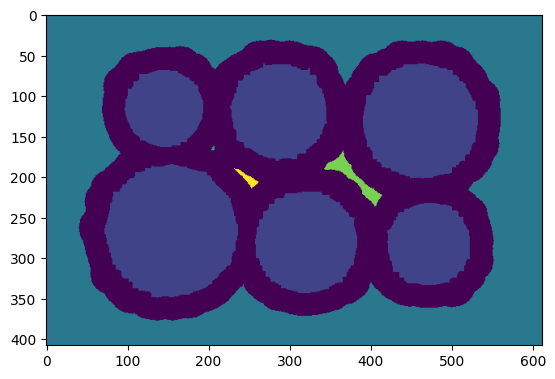

In [232]:
_,markers=cv2.connectedComponents(sure_fg)
markers=markers+1
markers[unknown==255]=0

plt.imshow(markers)

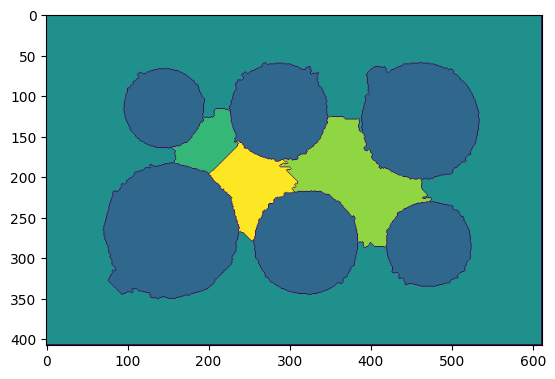

In [241]:
markers=cv2.watershed(coins,markers)
plt.imshow(markers)

In [278]:
coin_mask=np.zeros_like(coins_grey)
unique_labels=np.unique(markers)
instance_number=1
font=cv2.FONT_HERSHEY_SIMPLEX
for label in unique_labels:
    if label==1 or label==0:
        continue
    mask=np.uint8(markers==label)
    contours,_=cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        area=cv2.contourArea(contour)
        perimeter=cv2.arcLength(contour,True)

        if perimeter==0:
            continue

    circularity=4*np.pi*(area/(perimeter*perimeter))
    if 1.4>circularity>0.6 and area>100:
        cv2.drawContours(original_image,[contour],-1,(0,255,0),2)
        x,y,w,h=cv2.boundingRect(contour)
        cv2.putText(original_image,f"Coin{instance_number}",(x,y-10),font,0.6,(255,0,0),2)
        coin_mask=cv2.bitwise_or(coin_mask,mask)
        cv2.rectangle(original_image,(x-5,y-5),(x+w+5,y+h+5),(160,50,250),2)
        instance_number+=1



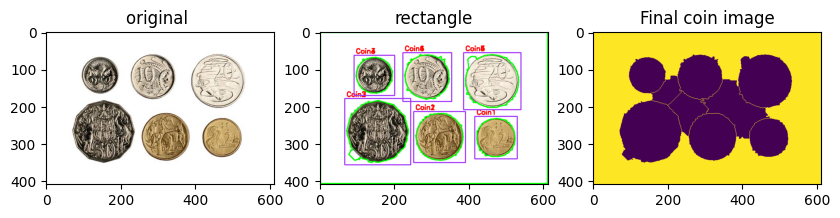

In [279]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(coins_rgb)
plt.title("original ")

plt.subplot(1,3,2)
plt.imshow(original_image)
plt.title("rectangle")

plt.subplot(1,3,3)
plt.imshow(np.array(coin_mask,dtype=np.uint8))
plt.title("Final coin image")

plt.show()

array([-1,  1,  2,  3,  4,  5], dtype=int32)